In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Count Values Of Each Sentiment Label'}, xlabel='Sentiment', ylabel='count'>

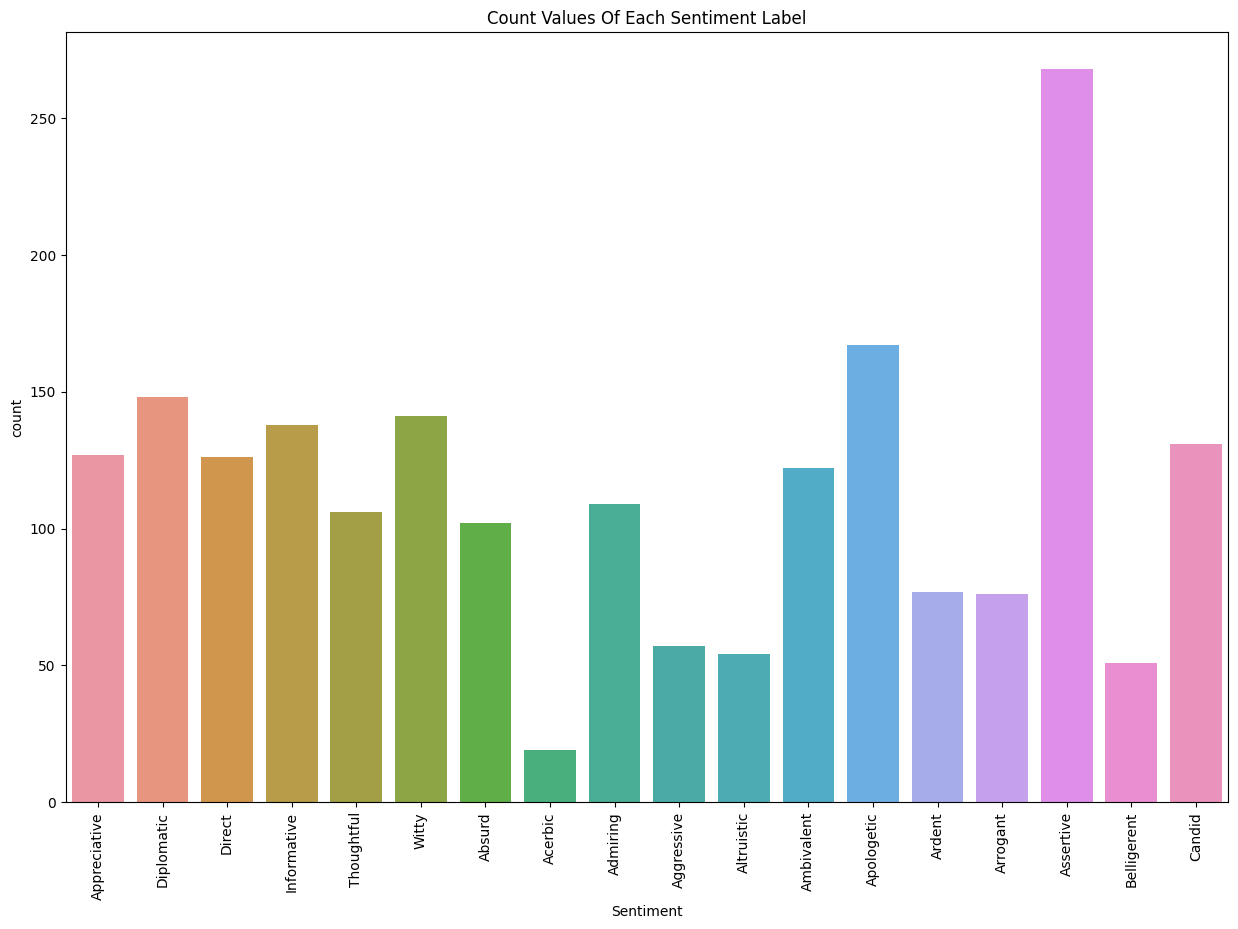

In [ ]:
import re
with open(r'/content/drive/MyDrive/HireSight/tone_analyzer/tone_dataset.txt','r',encoding='utf-8') as file:
    lines = file.readlines()
    data = [line.strip().split('||') for line in lines]
for message in data:
    message[1] = re.sub(r'\.', '', message[1]).strip()
df=pd.DataFrame(data,columns=['Messages','Sentiment'])

plt.figure(figsize=(15,10))
plt.title("Count Values Of Each Sentiment Label")
plt.xticks(rotation=90)
sns.countplot(data=df,x='Sentiment')

In [ ]:
unique_labels=df['Sentiment'].unique()
print("Number of Unique Values equals to --> ",len(unique_labels))
unique_labels

result_dict={}
for key, value in enumerate(unique_labels):
    result_dict[value] = key

df['Sentiment']=df['Sentiment'].map(result_dict)

Number of Unique Values equals to -->  18


In [ ]:
result_dict

{'Appreciative': 0,
 'Diplomatic': 1,
 'Direct': 2,
 'Informative': 3,
 'Thoughtful': 4,
 'Witty': 5,
 'Absurd': 6,
 'Acerbic': 7,
 'Admiring': 8,
 'Aggressive': 9,
 'Altruistic': 10,
 'Ambivalent': 11,
 'Apologetic': 12,
 'Ardent': 13,
 'Arrogant': 14,
 'Assertive': 15,
 'Belligerent': 16,
 'Candid': 17}

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # To perform stemming Loved ----> Love
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z]'," ",df['Messages'][i])
    review=review.lower()
    review=review.split()
    stemming=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[stemming.stem(word) for word in review]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,Messages,Sentiment
0,Your creativity is truly inspiring,0
1,Thank you for always being so kind and thought...,0
2,Your positivity is infectious,0
3,Your hard work and dedication are truly impres...,0
4,Your kindness and generosity are truly appreci...,0
...,...,...
2014,"I don't want to sound critical, but your perfo...",17
2015,"To be candid, I don't think you're being reali...",17
2016,"Let's be honest, your idea is not original.",17
2017,"If I'm being honest, I don't think you're a go...",17


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'X' is a list of text documents and 'y' is a list of corresponding labels
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)

from sklearn.preprocessing import MultiLabelBinarizer
y=df.iloc[:,-1].values
#y
#mlb = MultiLabelBinarizer()
#y = mlb.fit_transform(df['Sentiment'].apply(lambda x: [x]))
from sklearn.model_selection import train_test_split
import numpy as np

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("X Train Shape", x_train.shape)
print("X Test Shape", x_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (1615, 2067)
X Test Shape (404, 2067)
Y Train Shape (1615,)
Y Test Shape (404,)


In [ ]:
# function to return key for any value

def get_key(dict,val):

    for key, value in dict.items():
        if val == value:
            return key

from sklearn.svm import SVC

# Initialize the SVC classifier
svc = SVC(kernel="linear", decision_function_shape="ovr",probability=True)

# Train the SVC classifier
svc.fit(x_train, y_train)

# Make predictions on the test data
y_prob = svc.predict_proba(x_test)

# Get the top 5 probabilities for each sample
top_5_probs = np.argsort(y_prob, axis=1)[:, -5:]

# Get the predicted classes for the top 5 probabilities
top_5_classes = svc.classes_[top_5_probs]

# Print the top 5 classes and their probabilities
#for i in range(len(y_test)):
    #print(f"Sample {i}:")
output = {}
for j in range(5):
    output[get_key(result_dict,top_5_classes[0, j])]=y_prob[j, top_5_classes[0, j]]
output

{'Direct': 0.028992283394375307,
 'Informative': 0.34519089433653494,
 'Absurd': 0.021199044790823508,
 'Witty': 0.006017401496231748,
 'Arrogant': 0.0008756000372785299}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the class labels for the test data
y_pred = svc.predict(x_test)
# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
#confusion_mtx = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {(accuracy*100):.2f}%")
print("Classification Report:\n", classification_rep)

Accuracy: 83.42%
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.87      0.93      0.90        28
           2       0.92      0.77      0.84        30
           3       0.94      0.91      0.92        32
           4       0.89      0.89      0.89        19
           5       0.68      0.96      0.79        24
           6       0.73      1.00      0.85        11
           7       0.00      0.00      0.00         2
           8       0.68      0.58      0.62        26
           9       0.73      0.85      0.79        13
          10       0.80      0.33      0.47        12
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        39
          13       0.94      1.00      0.97        17
          14       1.00      0.53      0.69        19
          15       0.78      0.91      0.84        56
          16       0.75      0.50      0

In [ ]:
import pickle
with open('/content/drive/MyDrive/HireSight/tone_analyzer/tone_analyzer.pkl', 'wb') as f:
    pickle.dump(svc,f)

In [ ]:
import joblib

# Save the TfidfVectorizer to a file
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/HireSight/tone_analyzer/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/HireSight/tone_analyzer/tfidf_vectorizer.pkl']

In [ ]:
text = '''Hi Sarah, Thank you for the opportunity to interview for the Software Engineer position at Google. I'm Diya and I'm a Software Engineer with 3 years of experience in the tech industry. In my previous role at Amazon, I was responsible for developing and maintaining large-scale distributed systems. I have a proven track record of success in building and deploying reliable and scalable software. For example, I led the development of a new feature that increased user engagement by 10%. I'm also skilled in Python, Java, and C++. I'm a highly motivated and results-oriented individual, and I'm confident that I have the skills and experience necessary to be successful in this role. I'm excited about the opportunity to join Google because I'm passionate about building innovative products that make a difference in the world. I'm also impressed by Google's commitment to engineering excellence and its culture of innovation. I'm confident that I can make a significant contribution to your team and I'm eager to learn more about the Software Engineer position. Thank you for your time and consideration.'''

In [ ]:
# Vectorize the text input using the same tfidf_vectorizer that was used to transform the original training data
answer = tfidf_vectorizer.transform(text.split('.'))

# Now, the dimensions of the 'answer' variable should match those of your original X_train data, so you can call predict_proba without any errors
prob = svc.predict_proba(answer)

In [ ]:
# Use zip to transpose the list of lists
probabilities = []
for i in range(len(prob[0])):
  pro = 0
  for j in range(len(prob)):
    pro += prob[j][i]
  probabilities.append(pro)

In [ ]:
op = {}
for i in range(len(probabilities)):
  op[get_key(result_dict,svc.classes_[i])] = probabilities[i]
json = sorted(op.items(), key=lambda item: item[1], reverse=True)


In [ ]:
json

[(15, 2.6185256138285062),
 ('Assertive', 2.6185256138285062),
 (11, 1.8649070021828207),
 ('Ambivalent', 1.8649070021828207),
 ('Absurd', 1.0830008858357405),
 (6, 1.0830008858357405),
 ('Informative', 0.9604586381818215),
 (3, 0.9604586381818215),
 (0, 0.9204647301307651),
 ('Appreciative', 0.9204647301307651),
 ('Direct', 0.8053150180022995),
 (2, 0.8053150180022995),
 ('Witty', 0.5782798364362469),
 (5, 0.5782798364362469),
 (4, 0.5512661588608203),
 ('Thoughtful', 0.5512661588608203),
 (12, 0.43516572386560626),
 ('Apologetic', 0.43516572386560626),
 (8, 0.42106527403981525),
 ('Admiring', 0.42106527403981525),
 (13, 0.41486876993802824),
 ('Ardent', 0.41486876993802824),
 (10, 0.3242892370265397),
 ('Altruistic', 0.3242892370265397),
 (1, 0.2959738155103318),
 ('Diplomatic', 0.2959738155103318),
 ('Arrogant', 0.21881270573917727),
 (14, 0.21881270573917727),
 (9, 0.19839635427874971),
 ('Aggressive', 0.19839635427874971),
 (16, 0.1428480759481553),
 ('Belligerent', 0.142848075948

In [ ]:
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 21.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 

In [ ]:
import whisper

model = whisper.load_model("small")

with open('/content/drive/MyDrive/HireSight/video_to_text.pkl', 'wb') as f:
    pickle.dump(model,f)

AttributeError: ignored

In [ ]:
import torch
from transformers import LlamaTokenizer, LlamaForCausalLM

## v2 models
model_path = 'openlm-research/open_llama_3b_v2'
# model_path = 'openlm-research/open_llama_7b_v2'

## v1 models
# model_path = 'openlm-research/open_llama_3b'
# model_path = 'openlm-research/open_llama_7b'
# model_path = 'openlm-research/open_llama_13b'

tokenizer = LlamaTokenizer.from_pretrained(model_path)
model = LlamaForCausalLM.from_pretrained(
    model_path, torch_dtype=torch.float16, device_map='auto',
)

In [ ]:
prompt = 'Q: What is the largest animal?\nA:'
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
# Convert the input tensor to Int
input_ids_int = input_ids_half.int()

# Generate the text
generation_output = model(input_ids_int)

# Print the result
print(tokenizer.decode(generation_output[0]))

RuntimeError: ignored